In [3]:
# import libraries
import pandas as pd
import numpy as np

from src.utils import *

In [2]:
# Read count df
count_df = pd.read_csv('./Data/HLA_peptide_count.csv',index_col=0)

In [4]:
# Load HLA sequences
fasta_file = './Data/allele_seq_IPD_IMGT.fasta'
HLA_seq_df = fasta_to_dataframe(fasta_file)
HLA_seq_df['HLA_2fields'] = ['HLA-'+i[0:7] for i in HLA_seq_df['HLA']]
HLA_seq_df['remaining_fields'] = [i[8:] for i in HLA_seq_df['HLA']]

# # # select HLA basic version
HLA_seq_df = HLA_seq_df[HLA_seq_df['HLA_2fields'].isin(count_df['allele'].to_list())]
HLA_seq_df_1 = HLA_seq_df[HLA_seq_df['remaining_fields'].isin(['01:01','01'])].reset_index(drop=True)
HLA_seq_df_1

,ID,Sequence,HLA,length,HLA_2fields,remaining_fields
0,HLA:HLA00001,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,A*01:01:01:01,365,HLA-A*01:01,01:01
1,HLA:HLA00005,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,A*02:01:01:01,365,HLA-A*02:01,01:01
2,HLA:HLA00007,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,A*02:02:01:01,365,HLA-A*02:02,01:01
3,HLA:HLA00008,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,A*02:03:01:01,365,HLA-A*02:03,01:01
4,HLA:HLA00009,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,A*02:04:01,365,HLA-A*02:04,01
...,...,...,...,...,...,...
98,HLA:HLA00447,MRVMAPRTLILLLSGALALTETWACSHSMRYFYTAVSRPGRGEPRF...,C*08:03:01:01,366,HLA-C*08:03,01:01
99,HLA:HLA00453,MRVMAPRTLILLLSGALALTETWACSHSMRYFYTAVSRPGRGEPRF...,C*12:02:01,366,HLA-C*12:02,01
100,HLA:HLA00455,MRVMAPRTLILLLSGALALTETWACSHSMRYFYTAVSRPGRGEPRF...,C*12:03:01:01,366,HLA-C*12:03,01:01
101,HLA:HLA00462,MRVMAPRTLILLLSGALALTETWACSHSMRYFSTSVSRPGRGEPRF...,C*14:02:01:01,366,HLA-C*14:02,01:01


In [5]:
# Remaining HLA list where we first obtain exact matches
remaining_hla_ls = [i[4:] for i in count_df['allele'].to_list() if i not in HLA_seq_df_1['HLA_2fields'].to_list()]
HLA_seq_df_2 = HLA_seq_df[HLA_seq_df['HLA'].isin(remaining_hla_ls)]

# Remaining HLA
remaining_hla_ls = ['HLA-'+i for i in remaining_hla_ls if 'HLA-'+i not in HLA_seq_df_2['HLA_2fields'].to_list()]

HLA_seq_df_3 = HLA_seq_df[(HLA_seq_df['HLA_2fields'].isin(remaining_hla_ls))&(HLA_seq_df['remaining_fields']=='02:01')]

# Remaining HLA
[i for i in remaining_hla_ls if i not in HLA_seq_df_3['HLA_2fields'].to_list()]


['HLA-B*07:01', 'HLA-B*44:01', 'HLA-A*24:01']

Skip 'HLA-B*07:01', 'HLA-B*44:01', 'HLA-A*24:01' because there was error or missing data in sequence:

https://www.ebi.ac.uk/ipd/imgt/hla/alleles/allele/?accession=HLA00049

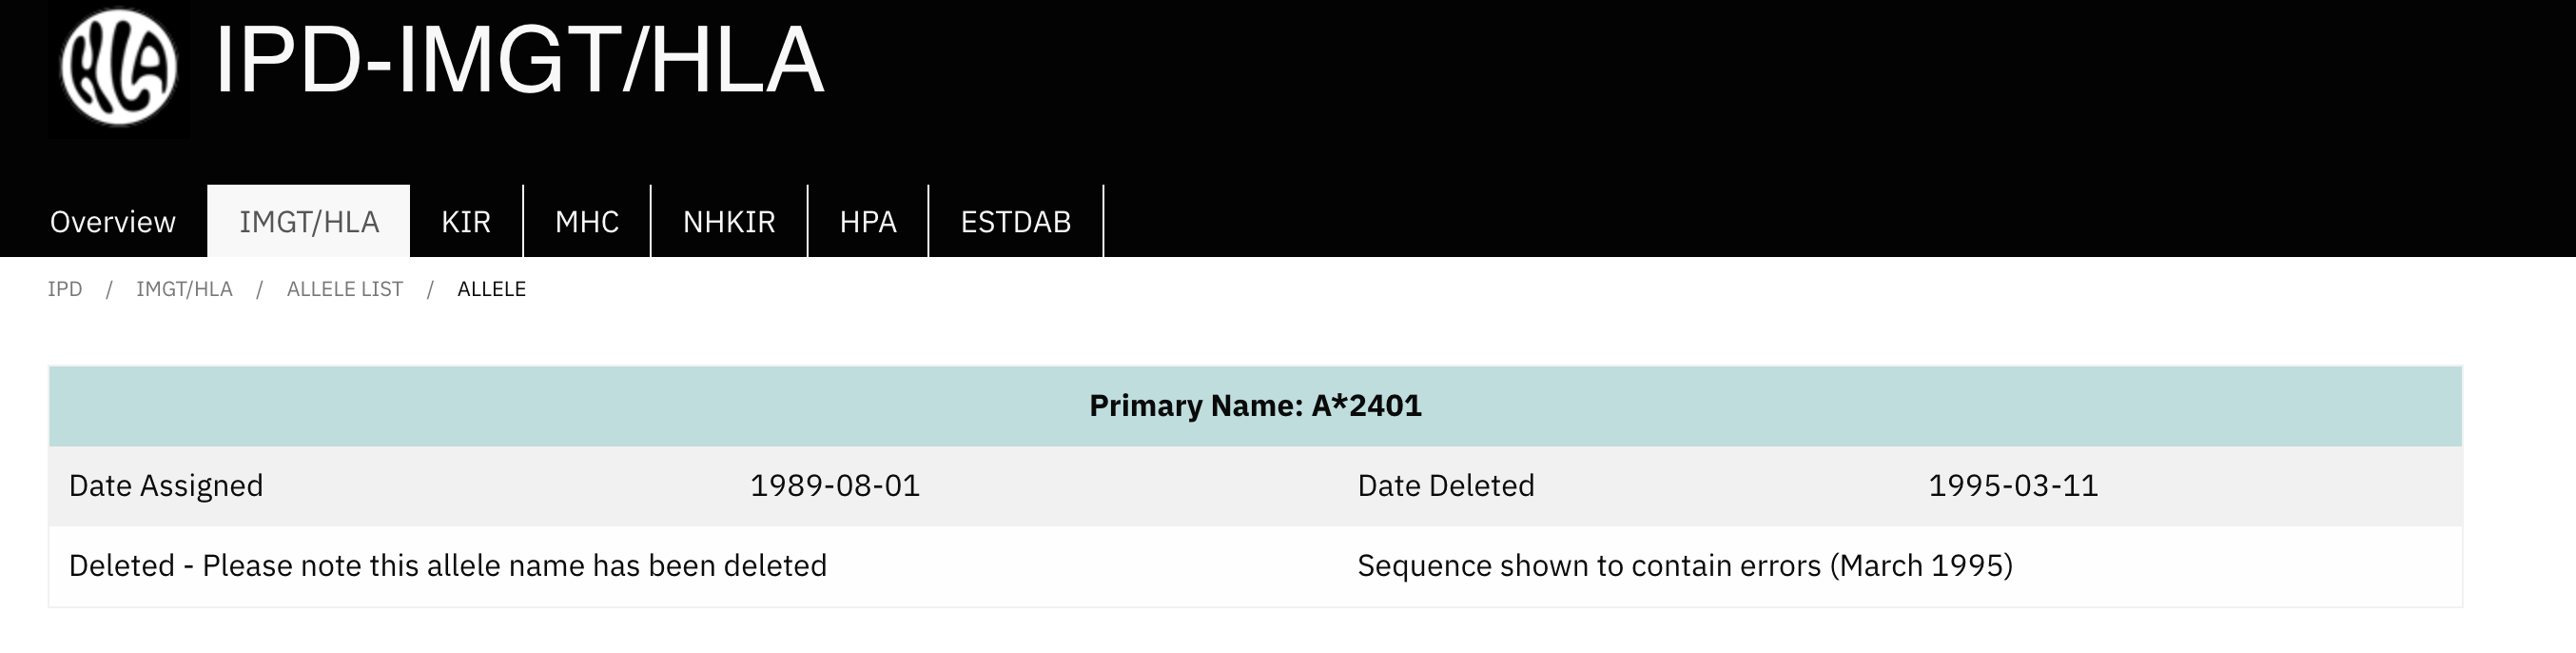

In [6]:
# Combine
HLA_seq_interested_df = pd.concat([HLA_seq_df_1, HLA_seq_df_2, HLA_seq_df_3])
HLA_seq_interested_df.reset_index(drop=True).to_csv('./Data/HLA_seqs_of_interest.csv')

In [7]:
HLA_seq_interested_df

,ID,Sequence,HLA,length,HLA_2fields,remaining_fields
0,HLA:HLA00001,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,A*01:01:01:01,365,HLA-A*01:01,01:01
1,HLA:HLA00005,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,A*02:01:01:01,365,HLA-A*02:01,01:01
2,HLA:HLA00007,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,A*02:02:01:01,365,HLA-A*02:02,01:01
3,HLA:HLA00008,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,A*02:03:01:01,365,HLA-A*02:03,01:01
4,HLA:HLA00009,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,A*02:04:01,365,HLA-A*02:04,01
...,...,...,...,...,...,...
15236,HLA:HLA01607,SHSMRYFHTAMSRPGRGEPRFITVGYVDDTLFVRFDSDATSPRKEP...,B*45:06,181,HLA-B*45:06,
17748,HLA:HLA01135,MRVTAPRTLLLLLWGAVALTETWAGSHSMRYFYTAMSRPGRGEPRF...,B*83:01,362,HLA-B*83:01,
1374,HLA:HLA00023,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,A*02:17:02:01,365,HLA-A*02:17,02:01
6344,HLA:HLA00097,MAVMAPRTLLLLLLGALALTQTWAGSHSMRYFTTSVSRPGRGEPRF...,A*31:01:02:01,365,HLA-A*31:01,02:01
